In [1]:
%reload_ext autoreload
%autoreload 2

# Static potential

In [2]:

#!/usr/bin/env python
# -*- coding:utf-8 -*-
#
# Created: 06/2023
# Author: Carmelo Mordini <cmordini@phys.ethz.ch>


import numpy as np
from pytrans import objectives as obj
from pytrans.conversion import freq_to_curv
from pytrans.ions import Ca40
from pytrans.functions import zpspace
from pytrans.solver import solver, init_waveform

from models.segmented_trap import SegmentedTrap

from pathlib import Path
data_dir = Path('.').resolve() / 'data'

trap = SegmentedTrap()

n_samples = 1
waveform = init_waveform(n_samples, trap.n_electrodes)

x0 = 0
r0 = (x0, 0, trap.z0)
ion = Ca40
axial_curv = freq_to_curv(1e6, ion=Ca40)
radial_curv = 2.5e7


objectives = [
    obj.GradientObjective(waveform[0], trap, *r0, value=0, ion=Ca40),
    obj.HessianObjective(waveform[0], trap, *r0, entries='xx', value=axial_curv, ion=Ca40),
    obj.HessianObjective(waveform[0], trap, *r0, entries='yz', value=radial_curv, ion=Ca40),
 
    obj.VoltageObjective(waveform, 0),
    obj.VoltageObjective(waveform, 10, constraint_type='<='),
    obj.VoltageObjective(waveform, -10, constraint_type='>='),
]

solver_results = solver(objectives, verbose=True)
waveform = solver_results.waveform.value  # get array from cvxpy variable

savename = data_dir / 'waveform_static_segmented_trap.npy'
print(f"Saving waveform as ndarray to {savename}")
np.save(savename, waveform)


Compiling objectives: 100%|██████████| 6/6 [00:00<00:00, 349.77it/s]

                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Aug 25 03:46:19 PM: Your problem has 6 variables, 2 constraints, and 0 parameters.
(CVXPY) Aug 25 03:46:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 25 03:46:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 25 03:46:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 25 03:46:19 PM: Compiling problem (target solver=MOSEK).
(CVXPY) Aug 25 03:46:19 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing ->

(CVXPY) Aug 25 03:46:19 PM: Finished problem compilation (took 4.000e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Aug 25 03:46:19 PM: Invoking solver MOSEK  to obtain a solution.


(CVXPY) Aug 25 03:46:19 PM: Problem
(CVXPY) Aug 25 03:46:19 PM:   Name                   :                 
(CVXPY) Aug 25 03:46:19 PM:   Objective sense        : max             
(CVXPY) Aug 25 03:46:19 PM:   Type                   : CONIC (conic optimization problem)
(CVXPY) Aug 25 03:46:19 PM:   Constraints            : 10              
(CVXPY) Aug 25 03:46:19 PM:   Cones                  : 4               
(CVXPY) Aug 25 03:46:19 PM:   Scalar variables       : 31              
(CVXPY) Aug 25 03:46:19 PM:   Matrix variables       : 0               
(CVXPY) Aug 25 03:46:19 PM:   Integer variab

## Analysis

--------------
Trap potential analysis for ion Ca40: 
Equilibrium position [um]
[ 0.0019  0.0045 -0.    ]
Gradient [V/m]
[0.0305 0.5236 0.1083]
Displacement at 1 MHz [um]
[0.0019 0.032  0.0066]
Hessian [V/m2]
[[ 1.6185e+07 -4.7862e+04  3.5179e+04]
 [-4.7862e+04  1.1676e+08  2.5001e+07]
 [ 3.5179e+04  2.5001e+07  1.4452e+08]]
Normal mode frequencies [MHz]
[0.994899 2.49812 3.12065]
Eigenvectors
[[1 0.000572 -0.000385]
 [-0.000688 0.862 -0.507]
 [4.22e-05 0.507 0.862]]
Tilt angle of mode 2 (3.12): 59.52°

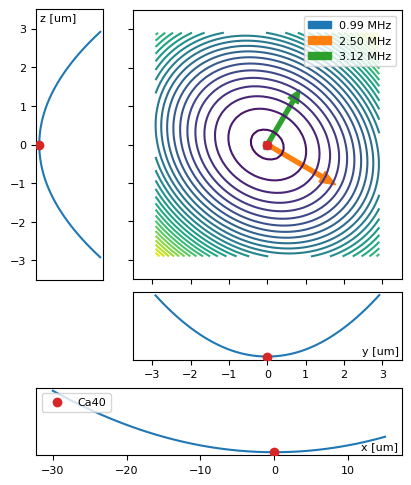

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from models.segmented_trap import SegmentedTrap
from models.segmented_trap.plot import plot_voltages_on_trap
from pytrans.analysis import analyse_potential
from pytrans.plotting.plotting import plot_potential_make_layout, plot_potential

from pytrans.ions import Ca40

trap = SegmentedTrap()
waveform = np.load(data_dir / 'waveform_static_segmented_trap.npy')

r0 = (x0, 0, trap.z0)
roi = ((x0 - 30e-6, x0 + 15e-6), 3.5e-6, 3.5e-6)
res = analyse_potential(trap, voltages=waveform[0], ions=Ca40, r0=r0, roi=roi, verbose=False)
res


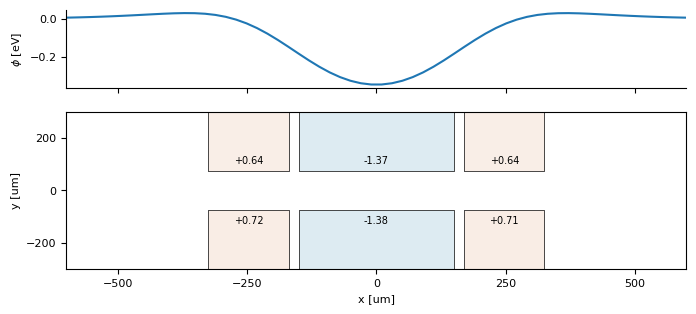

In [4]:
_ = plot_voltages_on_trap(trap, waveform[0])


## Mixed-species ion crystal

--------------
Trap potential analysis for ion Ca40: 
Equilibrium position [um]
[ 0.001  -0.001   0.0004]
Gradient [V/m]
[ 0.0155 -0.1128  0.0268]
Displacement at 1 MHz [um]
[ 0.0009 -0.0069  0.0016]
Hessian [V/m2]
[[ 1.6185e+07 -5.1225e+04  3.5214e+04]
 [-5.1225e+04  1.1695e+08  2.5000e+07]
 [ 3.5214e+04  2.5000e+07  1.4436e+08]]
Normal mode frequencies [MHz]
[0.994893 2.49935 3.11992]
Eigenvectors
[[1 0.000606 -0.000393]
 [-0.000722 0.86 -0.51]
 [2.94e-05 0.51 0.86]]
Tilt angle of mode 2 (3.12): 59.36°
--------------
Mode solver analysis for ion crystal [Be9, Ca40, Ca40, Be9]: 
Equilibrium positions [um]
[[-6.3874 -0.0031 -0.0462]
 [-2.0258 -0.0037  0.0092]
 [ 2.0082  0.0001  0.0077]
 [ 6.3588 -0.0002 -0.0495]]
Normal modes
  Freq [MHz]                     Be9                                Ca40                               Ca40                                 Be9
------------  ----------  ----------  ----------  ----------  ----------  ---------  ----------  ----------  ---------- 

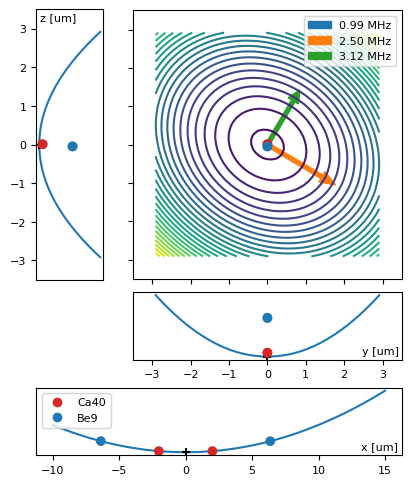

In [5]:
from pytrans.ions import Ca40, Be9
from pytrans.analysis import analyse_potential

r0 = (x0, 0, trap.z0)
# roi = (20e-6, 3.5e-6, 3.5e-6)
roi = ((x0 - 10e-6, x0 + 15e-6), 3.5e-6, 3.5e-6)

ions = [Be9, Ca40, Ca40, Be9]
res = analyse_potential(trap, voltages=waveform[0], ions=ions, ion1=Ca40, r0=r0, roi=roi, verbose=False)
res

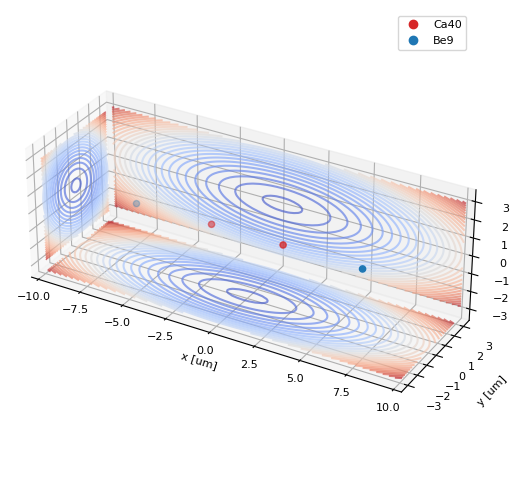

In [6]:
from pytrans.plotting import plot3d_potential

roi = (10e-6, 3.5e-6, 3.5e-6)
_ = plot3d_potential(trap, waveform[0], Ca40, r0, roi, analyse_results=res)